In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
sys.path.append('C:\\Users\\Bhujay_ROG\\MyDev\\OCLog\\oclog\hdfs')
##### appending the static path to aavoid the error 
# ModuleNotFoundError                       Traceback (most recent call last)
# Input In [9], in <cell line: 3>()
#       2 hdfs_obj_full_name_path = 'C:\\Users\\Bhujay_ROG\\MyDev\\OCLog\\oclog\\hdfs\\data\\hdfsobj_32_64_no_meta.pkl'
#       3 with open(hdfs_obj_full_name_path, 'rb') as f:
# ----> 4             hdfslogs = pickle.load(f)

# ModuleNotFoundError: No module named 'hdflogv3'
from oclog.BGL.mxlv2 import MixedLog, get_embedding_layer
from oclog.hdfs.hdflogv3 import HDFSLogv3
import numpy as np
import pandas as pd
from oclog.openset.opensetv11 import OpenSet
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

In [2]:
mlog = MixedLog(debug=True,
                mixed_logs=True,
                padded_seq_len=32, 
                padded_char_len=176, 
                log_meta_status='time_ip',                
                save_padded_num_sequences=True,
                load_from_pkl=False, )
res = mlog.get_mix_log_df()                                 
# train_test = mlog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls )
# train_data, val_data, test_data = train_test
# oset = OpenSet()
# res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
#                  pt_epochs=5, oc_epochs=5, ukc_label=4)

saved file name will be:  bgl_ukc_32_176_time_ip
############## you want to mix log from HDFS, let me try that ##################### 
#### I will change the existing label of BGL to accomodate hdfs label #####
saved file name will be:  bgl_ukc_32_176_time_ip
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip_tk.pkl
taking few selected classes from original bgl:  {'0': 114115, '1': 28439}
changed bgl classes:  {'0': 114115, '1': 28439}
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_176_time_ip.pkl
classes in hdfs df, lebeled_num_seq_df_epn: 
 {'hdfs_anomaly': 16838, 'hdfs_normal': 16838}
hdfs class map:  {'hdfs_normal': '2', 'hdfs_anomaly': '3'}
changed hdfs classes:  {'3': 16838, '2': 16838}
Merged the bgl and hdfs level as the mixed df:  {'0': 114115, '1': 28439, '3': 16838, '2': 

In [3]:
train_test = mlog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls=3 )

ablation set to : 1000
parameter value for designated_ukc_cls within multiclass:  3
############## you want to mix log from HDFS, let me try that ##################### 
#### I will change the existing label of BGL to accomodate hdfs label #####
saved file name will be:  bgl_ukc_32_176_time_ip
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip_tk.pkl
taking few selected classes from original bgl:  {'0': 114115, '1': 28439}
changed bgl classes:  {'0': 114115, '1': 28439}
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_176_time_ip.pkl
classes in hdfs df, lebeled_num_seq_df_epn: 
 {'hdfs_anomaly': 16838, 'hdfs_normal': 16838}
hdfs class map:  {'hdfs_normal': '2', 'hdfs_anomaly': '3'}
changed hdfs classes:  {'3': 16838, '2': 16838}
Merged the bgl and hdfs level as the mixed df:  {'0': 11

In [4]:
# mlog = MixedLog(debug=True,
#                 mixed_logs=True,
#                 padded_seq_len=32, 
#                 padded_char_len=176, 
#                 log_meta_status='time_ip',                
#                 save_padded_num_sequences=False,
#                 load_from_pkl=True,
#                 desgnated_ukc_cls=3                 )
# train_test = mlog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls=6)
# train_data, val_data, test_data = train_test

In [5]:
mlog.designated_ukc_cls

3

got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2.5
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-05-01 10:18:43.787556
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
75/75 [==============================] - ETA: 0s - loss: 0.2146 - accuracy: 0.9054 - precision_2: 0.9423 - recall_2: 0.8708
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-05-01_10_18_43.787556\
INFO:tensorflow:Assets written to: data\ptmodel_2022-05-01_10_18_43.787556\assets
75/75 [==============================] - 20s 258ms/step - loss: 0.2146 - accuracy: 0.9054 - precision_2: 0.9423 - recall_2: 0.8708 - val_loss: 0.0033 - val_accuracy: 1.0000 - val_precision_2: 1.0000 - val_recall_2: 1.0000 - lr: 0.0010
Epoch 2/5
75/75 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
75/7

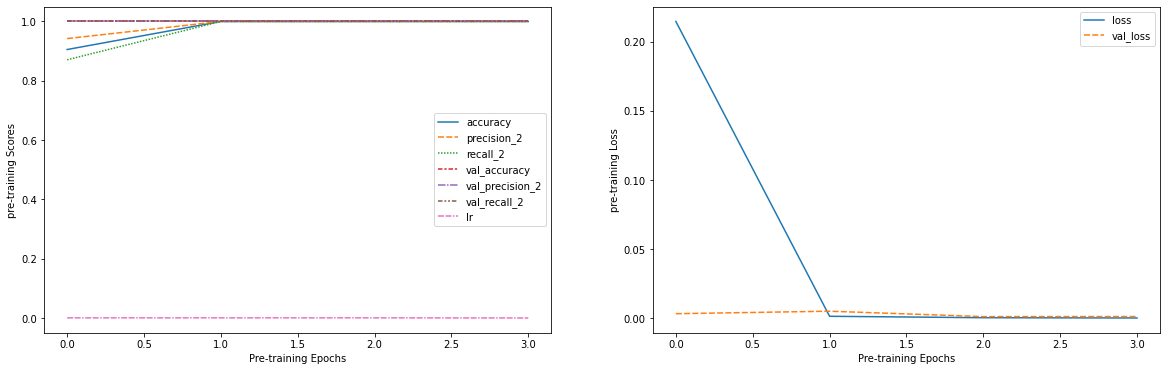

run_id:  2022-05-01_10_20_00.052421_280e4bb8c90a11ecae73ac8247733f47


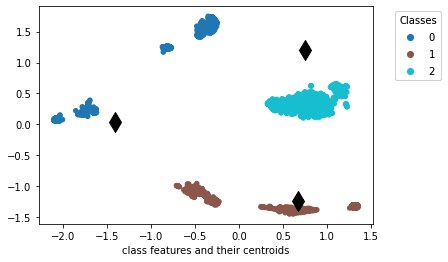

run_id:  2022-05-01_10_20_26.765921_37fa73d0c90a11ecb47dac8247733f47


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.11it/s]


epoch: 1/15, train_loss: 3.7009294033050537, F1_train: 0.7301489014638594 F1_val: 0.39197378001286876


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.18it/s]


epoch: 2/15, train_loss: 3.7009854316711426, F1_train: 0.7929127786421107 F1_val: 0.4427592744466719


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.18it/s]


epoch: 3/15, train_loss: 3.700953483581543, F1_train: 0.8046441298723187 F1_val: 0.551298720979572


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.10it/s]


epoch: 4/15, train_loss: 3.7010176181793213, F1_train: 0.8154461572020927 F1_val: 0.6471384109899267


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.14it/s]


epoch: 5/15, train_loss: 3.7009854316711426, F1_train: 0.8222682147291249 F1_val: 0.6631035485747527


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 6/15, train_loss: 3.7009241580963135, F1_train: 0.8266096230819945 F1_val: 0.6718661872532431


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.19it/s]


epoch: 7/15, train_loss: 3.7009904384613037, F1_train: 0.8294081914941003 F1_val: 0.6649215601611975


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.13it/s]


epoch: 8/15, train_loss: 3.700923204421997, F1_train: 0.8317659327543956 F1_val: 0.6649214659685865


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.15it/s]


epoch: 9/15, train_loss: 3.7009549140930176, F1_train: 0.833169990833258 F1_val: 0.6649214659685865


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.20it/s]


epoch: 10/15, train_loss: 3.701096296310425, F1_train: 0.8341016596238383 F1_val: 0.6718660968660968


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.20it/s]


epoch: 11/15, train_loss: 3.701023817062378, F1_train: 0.8354926567427355 F1_val: 0.6718659104130309


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.11it/s]


epoch: 12/15, train_loss: 3.7009830474853516, F1_train: 0.8387082920805007 F1_val: 0.6649213697824808


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.18it/s]


epoch: 13/15, train_loss: 3.7009174823760986, F1_train: 0.8427819921034153 F1_val: 0.6683937823834197


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.15it/s]


epoch: 14/15, train_loss: 3.7009594440460205, F1_train: 0.8432304766461152 F1_val: 0.6718660046056419


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.17it/s]


epoch: 15/15, train_loss: 3.700956106185913, F1_train: 0.8441249837852606 F1_val: 0.6579766241651488


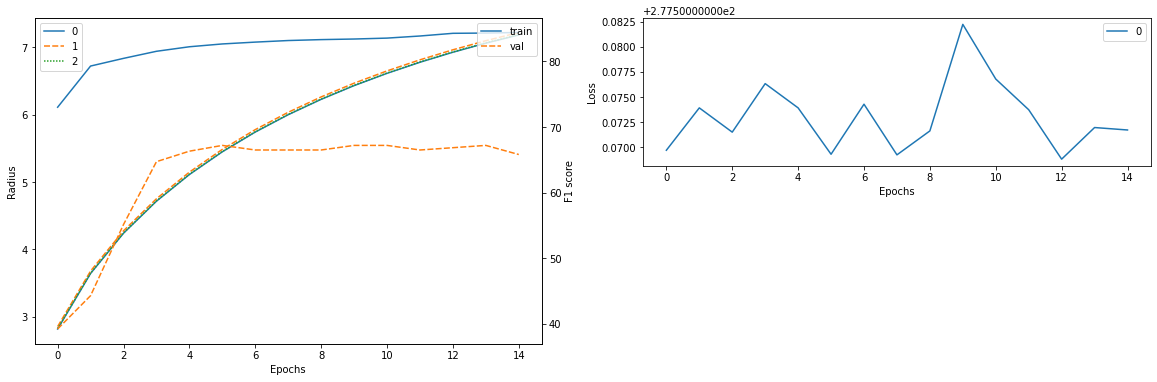

classification report for training:
[[800   0   0   0]
 [  0 293   0 507]
 [  0   0 794   6]
 [  0   0   0   0]]
78.62
f1_weighted: 0.8441249837852606, f1_macro: 0.6330937378389454, f1_micro: 0.7862500000000001, f_measure: {'Known': 84.4125, 'Open': 0, 'F1-score': 63.3094}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      0.37      0.54       800
           2       1.00      0.99      1.00       800
           3       0.00      0.00      0.00         0

    accuracy                           0.79      2400
   macro avg       0.75      0.59      0.63      2400
weighted avg       1.00      0.79      0.84      2400

classification report for test data:
[[94  0  0  0]
 [ 0  0  0 98]
 [ 0  0 93  2]
 [ 0  0 81 16]]
52.86
f1_weighted: 0.45380339139338305, f1_macro: 0.4604211389776079, f1_micro: 0.5286458333333334, f_measure: {'Known': 56.3817, 'Open': 15.0235, 'F1-score': 46.0421}
              precision  

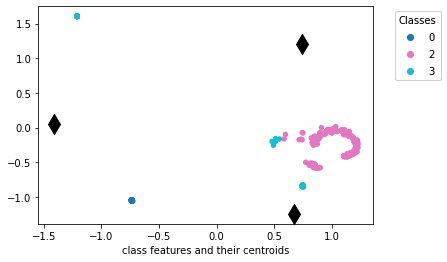

INFO:tensorflow:Assets written to: ram://7257df13-6889-452c-ad7d-55b5cbaa382c/assets


In [10]:
train_data, val_data, test_data = train_test
oset = OpenSet()
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
                 pt_epochs=5, oc_epochs=15, oc_lr=2.5) # designated_ukc_cls=3

got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2.5
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-05-01 11:47:12.648366
starting to create ptmodel automatically
staring pre trining
Epoch 1/16
75/75 [==============================] - ETA: 0s - loss: 0.2064 - accuracy: 0.9092 - precision_4: 0.9415 - recall_4: 0.8721
Epoch 1: val_accuracy improved from -inf to 0.99653, saving model to data\ptmodel_2022-05-01_11_47_12.648366\
INFO:tensorflow:Assets written to: data\ptmodel_2022-05-01_11_47_12.648366\assets
75/75 [==============================] - 19s 250ms/step - loss: 0.2064 - accuracy: 0.9092 - precision_4: 0.9415 - recall_4: 0.8721 - val_loss: 0.0050 - val_accuracy: 0.9965 - val_precision_4: 0.9965 - val_recall_4: 0.9965 - lr: 0.0010
Epoch 2/16
75/75 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000
Epoch 2: val_accuracy improved from 0.99653 to 1.0000

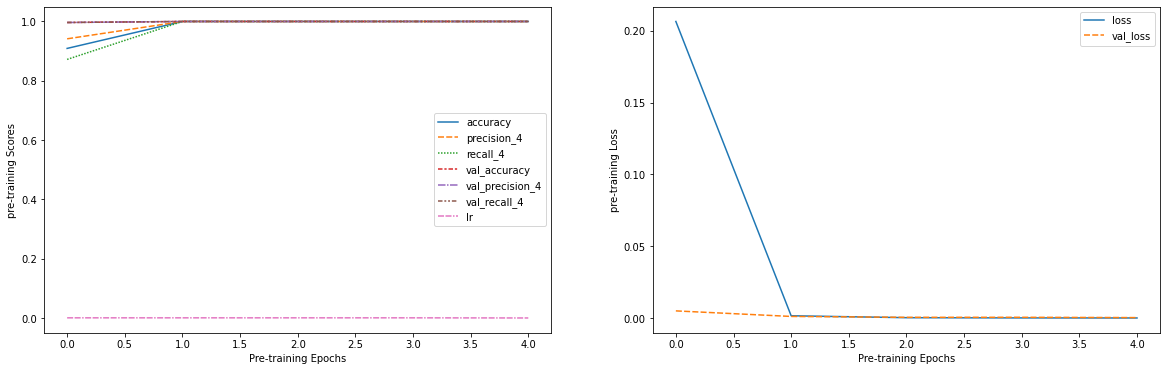

run_id:  2022-05-01_11_48_44.406633_8d9e4621c91611ec869bac8247733f47


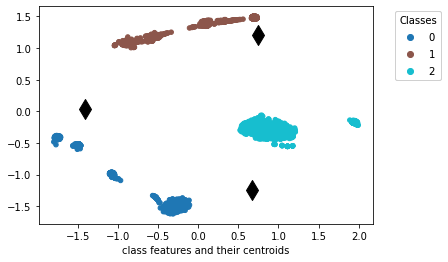

run_id:  2022-05-01_11_49_10.943760_9d6f84a3c91611ec9c55ac8247733f47


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.15it/s]


epoch: 1/5, train_loss: 3.8093197345733643, F1_train: 0.594568478059571 F1_val: 0.279720186042524


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.23it/s]


epoch: 2/5, train_loss: 3.8093032836914062, F1_train: 0.7653478254618574 F1_val: 0.4431343650208794


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.23it/s]


epoch: 3/5, train_loss: 3.8092684745788574, F1_train: 0.7786493375547962 F1_val: 0.65409606110079


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.22it/s]


epoch: 4/5, train_loss: 3.8092968463897705, F1_train: 0.7880974243799471 F1_val: 0.6805201247165533


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.24it/s]


epoch: 5/5, train_loss: 3.809347629547119, F1_train: 0.7939375544218139 F1_val: 0.6562126642771804


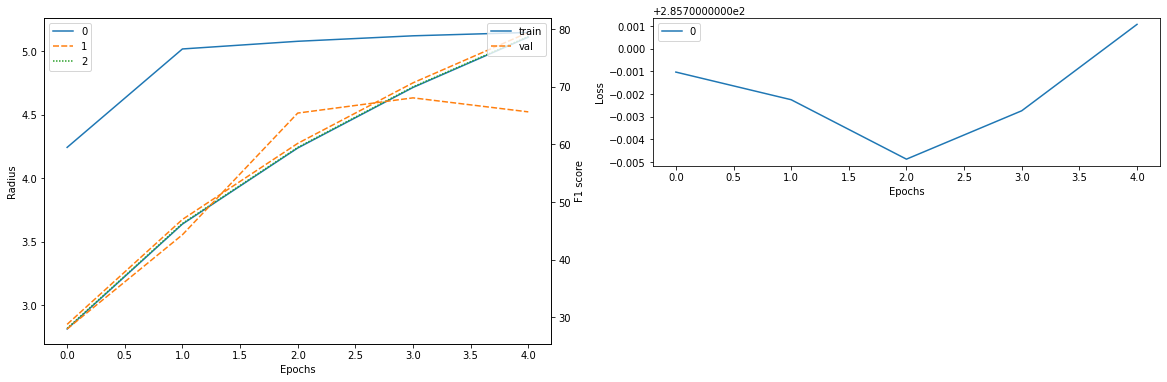

classification report for training:
[[798   0   0   2]
 [  0 193   0 607]
 [  0   0 791   9]
 [  0   0   0   0]]
74.25
f1_weighted: 0.7939375544218139, f1_macro: 0.5954531658163604, f1_micro: 0.7425, f_measure: {'Known': 79.3938, 'Open': 0, 'F1-score': 59.5453}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      0.24      0.39       800
           2       1.00      0.99      0.99       800
           3       0.00      0.00      0.00         0

    accuracy                           0.74      2400
   macro avg       0.75      0.56      0.60      2400
weighted avg       1.00      0.74      0.79      2400

classification report for test data:
[[97  0  0  0]
 [ 0  0  0 94]
 [ 0  0 94  1]
 [ 0  0 50 48]]
62.24
f1_weighted: 0.5488681715394365, f1_macro: 0.5462377819059359, f1_micro: 0.6223958333333334, f_measure: {'Known': 59.5537, 'Open': 39.834, 'F1-score': 54.6238}
              precision    recall  f1-s

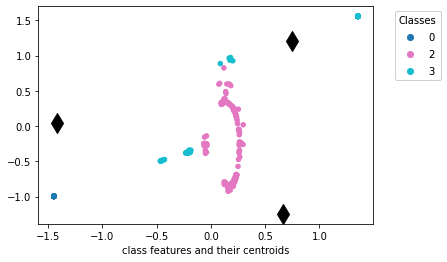

INFO:tensorflow:Assets written to: ram://0480db97-f8b3-4cd9-adc6-01a7f1dd17e3/assets


In [15]:
oset = OpenSet()
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
                 pt_epochs=16, oc_epochs=5, oc_lr=2.5, embedding_size=20, oc_wait=8)

In [ ]:
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
                 pt_epochs=16, oc_epochs=15, oc_lr=2.5, embedding_size=20, oc_wait=8, ), #ptmodel_get_mode='import'

got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2.5
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-05-01 12:00:32.151000
starting to create ptmodel automatically
staring pre trining
Epoch 1/16
75/75 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.8996 - precision_5: 0.9342 - recall_5: 0.8512
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-05-01_12_00_32.151000\
INFO:tensorflow:Assets written to: data\ptmodel_2022-05-01_12_00_32.151000\assets
75/75 [==============================] - 20s 254ms/step - loss: 0.2262 - accuracy: 0.8996 - precision_5: 0.9342 - recall_5: 0.8512 - val_loss: 0.0057 - val_accuracy: 1.0000 - val_precision_5: 1.0000 - val_recall_5: 1.0000 - lr: 0.0010
Epoch 2/16
75/75 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000 - precision_5: 1.0000 - recall_5: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
75

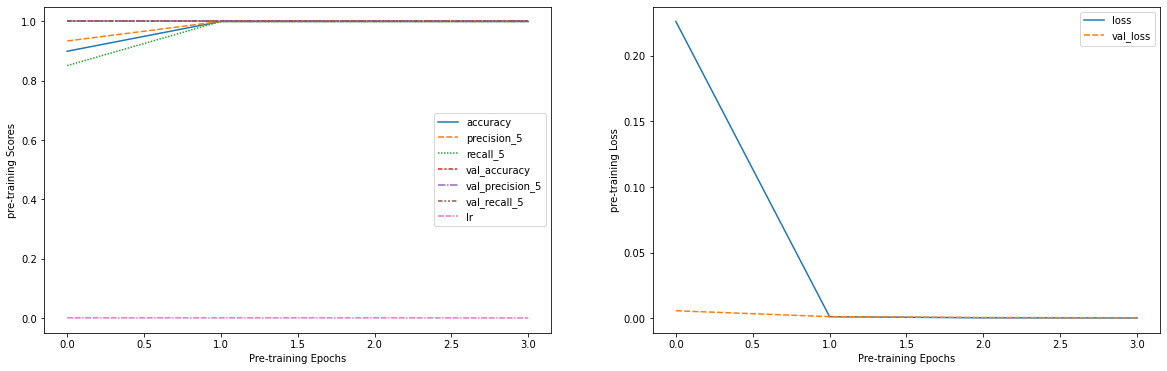

run_id:  2022-05-01_12_01_46.080520_5f883e59c91811ec81eaac8247733f47


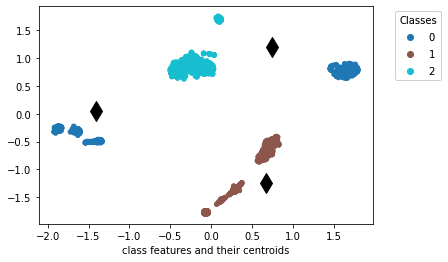

run_id:  2022-05-01_12_02_12.892851_6f837b00c91811ec82adac8247733f47


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.19it/s]


epoch: 1/15, train_loss: 3.6748437881469727, F1_train: 0.7251715294926167 F1_val: 0.3607819413716814


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.20it/s]


epoch: 2/15, train_loss: 3.67484974861145, F1_train: 0.7442143514483033 F1_val: 0.6168613906567318


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:25<00:00,  2.89it/s]


epoch: 3/15, train_loss: 3.674844264984131, F1_train: 0.7729259863733635 F1_val: 0.6483620169082127


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.13it/s]


epoch: 4/15, train_loss: 3.6748507022857666, F1_train: 0.7842248919865017 F1_val: 0.6595760233918129


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.17it/s]


epoch: 5/15, train_loss: 3.674844980239868, F1_train: 0.7906725514782098 F1_val: 0.657977021524142


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.17it/s]


epoch: 6/15, train_loss: 3.674849033355713, F1_train: 0.7932729021698766 F1_val: 0.6649216524216524


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.11it/s]


epoch: 7/15, train_loss: 3.6748437881469727, F1_train: 0.7956467277974911 F1_val: 0.6683937823834197


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.03it/s]


epoch: 8/15, train_loss: 3.67484974861145, F1_train: 0.7980965580252919 F1_val: 0.668393592004703


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.19it/s]


epoch: 9/15, train_loss: 3.6748502254486084, F1_train: 0.8008560739683859 F1_val: 0.6649216524216524


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 10/15, train_loss: 3.6748416423797607, F1_train: 0.8040243406097065 F1_val: 0.6736111111111112


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.11it/s]


epoch: 11/15, train_loss: 3.6748437881469727, F1_train: 0.805802835476426 F1_val: 0.65625


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.04it/s]


epoch: 12/15, train_loss: 3.674846887588501, F1_train: 0.8073635765943458 F1_val: 0.6805555555555556


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.15it/s]


epoch: 13/15, train_loss: 3.6748437881469727, F1_train: 0.8104575163398693 F1_val: 0.6736111111111112


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.15it/s]


epoch: 14/15, train_loss: 3.6748454570770264, F1_train: 0.8119908765070055 F1_val: 0.6701388888888888


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 15/15, train_loss: 3.674849033355713, F1_train: 0.8160362107985774 F1_val: 0.6631944444444444


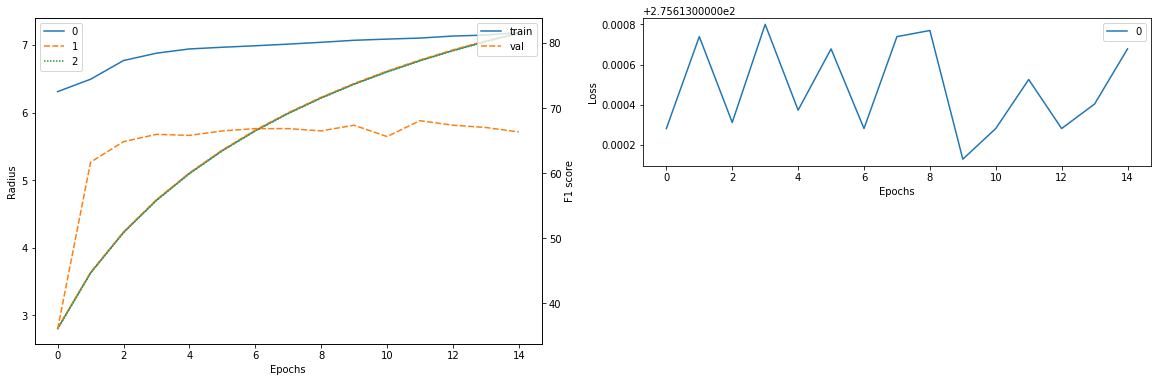

classification report for training:
[[800   0   0   0]
 [  0 231   0 569]
 [  0   0 800   0]
 [  0   0   0   0]]
76.29
f1_weighted: 0.8160362107985774, f1_macro: 0.612027158098933, f1_micro: 0.7629166666666667, f_measure: {'Known': 81.6036, 'Open': 0, 'F1-score': 61.2027}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      0.29      0.45       800
           2       1.00      1.00      1.00       800
           3       0.00      0.00      0.00         0

    accuracy                           0.76      2400
   macro avg       0.75      0.57      0.61      2400
weighted avg       1.00      0.76      0.82      2400

classification report for test data:
[[95  0  0  0]
 [ 0  0  0 98]
 [ 0  0 96  0]
 [ 0  0 82 13]]
53.12
f1_weighted: 0.4538030319136371, f1_macro: 0.45673587981007724, f1_micro: 0.53125, f_measure: {'Known': 56.691, 'Open': 12.6214, 'F1-score': 45.6736}
              precision    recall  f1-

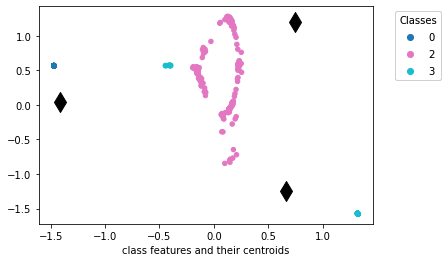

INFO:tensorflow:Assets written to: ram://ee7497ac-27b3-4493-99fd-5fbe78212d28/assets


In [17]:
oset = OpenSet()
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
                 pt_epochs=16, oc_epochs=15, oc_lr=2.5, embedding_size=20, oc_wait=8, ), #ptmodel_get_mode='import'

got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=3
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-05-01 12:22:30.992935
starting to create ptmodel automatically
staring pre trining
Epoch 1/16
75/75 [==============================] - ETA: 0s - loss: 0.2690 - accuracy: 0.8946 - precision_7: 0.9379 - recall_7: 0.8179
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-05-01_12_22_30.992935\
INFO:tensorflow:Assets written to: data\ptmodel_2022-05-01_12_22_30.992935\assets
75/75 [==============================] - 19s 251ms/step - loss: 0.2690 - accuracy: 0.8946 - precision_7: 0.9379 - recall_7: 0.8179 - val_loss: 0.0023 - val_accuracy: 1.0000 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - lr: 0.0010
Epoch 2/16
75/75 [==============================] - ETA: 0s - loss: 9.4133e-04 - accuracy: 1.0000 - precision_7: 1.0000 - recall_7: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000


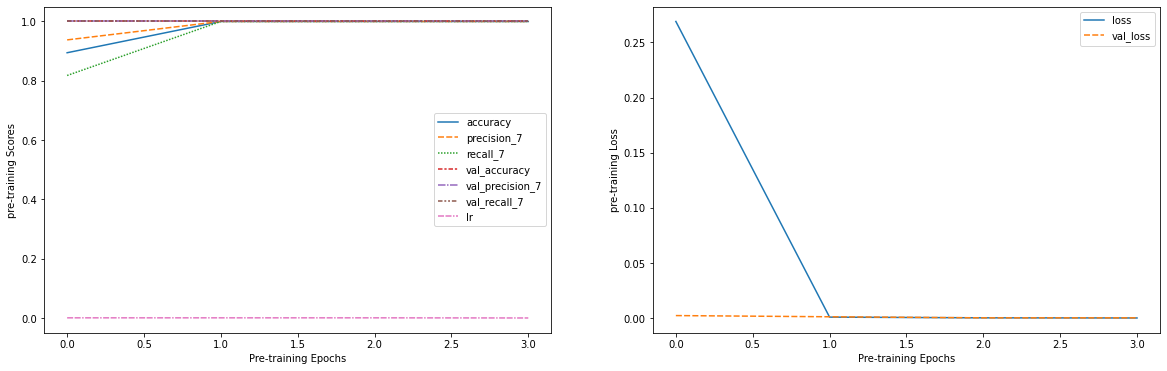

run_id:  2022-05-01_12_23_45.276147_71d58584c91b11ec92aaac8247733f47


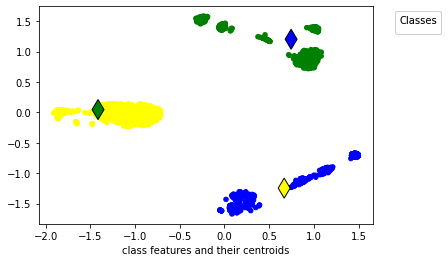

run_id:  2022-05-01_12_24_12.245401_81e8b3fac91b11ec94f3ac8247733f47


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 1/15, train_loss: 2.893932580947876, F1_train: 0.7420763132338085 F1_val: 0.4248642068787827


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.19it/s]


epoch: 2/15, train_loss: 2.8939590454101562, F1_train: 0.7895965852358391 F1_val: 0.6613765270506108


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.19it/s]


epoch: 3/15, train_loss: 2.8938965797424316, F1_train: 0.8092714297849785 F1_val: 0.6666666666666666


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.18it/s]


epoch: 4/15, train_loss: 2.8939313888549805, F1_train: 0.8318666374045474 F1_val: 0.6631944444444444


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 5/15, train_loss: 2.893888235092163, F1_train: 0.8535427322638185 F1_val: 0.6510321797207044


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.18it/s]


epoch: 6/15, train_loss: 2.893845319747925, F1_train: 0.8752475871893873 F1_val: 0.6753381326352531


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.18it/s]


epoch: 7/15, train_loss: 2.893889904022217, F1_train: 0.9038322086630344 F1_val: 0.6649216524216524


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:25<00:00,  2.96it/s]


epoch: 8/15, train_loss: 2.8939993381500244, F1_train: 0.9148761497436088 F1_val: 0.6718658142269253


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.17it/s]


epoch: 9/15, train_loss: 2.8939924240112305, F1_train: 0.9238094231761533 F1_val: 0.657977021524142


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.17it/s]


epoch: 10/15, train_loss: 2.893974781036377, F1_train: 0.9422898237984509 F1_val: 0.6718660968660968


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.17it/s]


epoch: 11/15, train_loss: 2.8939754962921143, F1_train: 0.9528114962805914 F1_val: 0.6683938746438746


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 12/15, train_loss: 2.8938708305358887, F1_train: 0.9573367565496049 F1_val: 0.6788104490500864


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 13/15, train_loss: 2.89387583732605, F1_train: 0.9583858653316945 F1_val: 0.6614490493166963


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 14/15, train_loss: 2.8939883708953857, F1_train: 0.958647224832341 F1_val: 0.6579768270944741


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:23<00:00,  3.16it/s]


epoch: 15/15, train_loss: 2.8939521312713623, F1_train: 0.958647224832341 F1_val: 0.6683938746438746
train score not improving  going to wait state 1
val score not improving  going to wait state 1


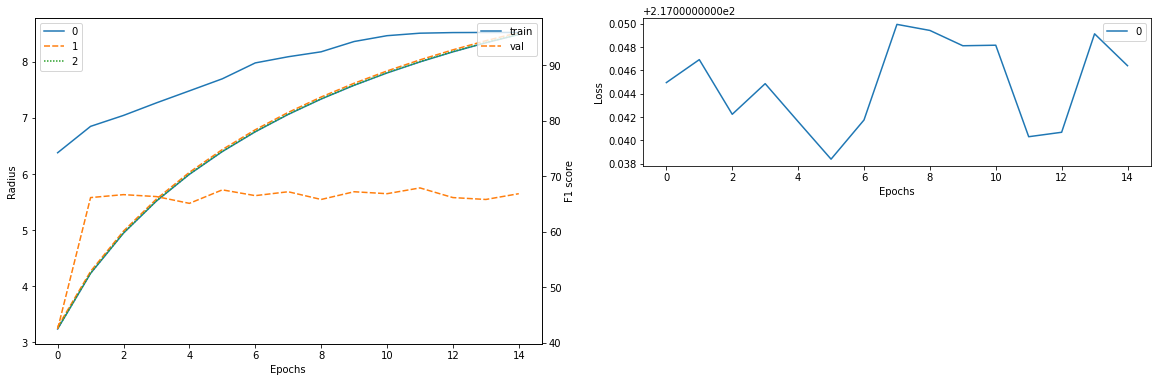

classification report for training:
[[800   0   0   0]
 [  0 629   0 171]
 [  0   0 793   7]
 [  0   0   0   0]]
92.58
f1_weighted: 0.958647224832341, f1_macro: 0.7189854186242558, f1_micro: 0.9258333333333333, f_measure: {'Known': 95.8647, 'Open': 0, 'F1-score': 71.8985}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      0.79      0.88       800
           2       1.00      0.99      1.00       800
           3       0.00      0.00      0.00         0

    accuracy                           0.93      2400
   macro avg       0.75      0.69      0.72      2400
weighted avg       1.00      0.93      0.96      2400

classification report for test data:
[[96  0  0  0]
 [ 0  0  0 97]
 [ 0  0 96  2]
 [ 0  0 75 18]]
54.69
f1_weighted: 0.4736739909718535, f1_macro: 0.47129580456718007, f1_micro: 0.546875, f_measure: {'Known': 57.1252, 'Open': 17.1429, 'F1-score': 47.1296}
              precision    recall  f

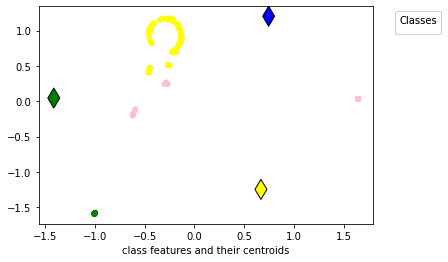

INFO:tensorflow:Assets written to: ram://3b91aa92-0dc8-4b63-956e-a35fa7f83081/assets


In [19]:
#centroid_class_color
oset = OpenSet()
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
                 pt_epochs=16, oc_epochs=15, oc_lr=3, embedding_size=22, oc_wait=8,
                manual_color_map=True, centroid_black=False, ), #ptmodel_get_mode='import'

ablation set to : 2000
parameter value for designated_ukc_cls within multiclass:  3
############## you want to mix log from HDFS, let me try that ##################### 
#### I will change the existing label of BGL to accomodate hdfs label #####
saved file name will be:  bgl_ukc_32_176_time_ip
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip_tk.pkl
taking few selected classes from original bgl:  {'0': 114115, '1': 28439}
changed bgl classes:  {'0': 114115, '1': 28439}
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_176_time_ip.pkl
classes in hdfs df, lebeled_num_seq_df_epn: 
 {'hdfs_anomaly': 16838, 'hdfs_normal': 16838}
hdfs class map:  {'hdfs_normal': '2', 'hdfs_anomaly': '3'}
changed hdfs classes:  {'3': 16838, '2': 16838}
Merged the bgl and hdfs level as the mixed df:  {'0': 11

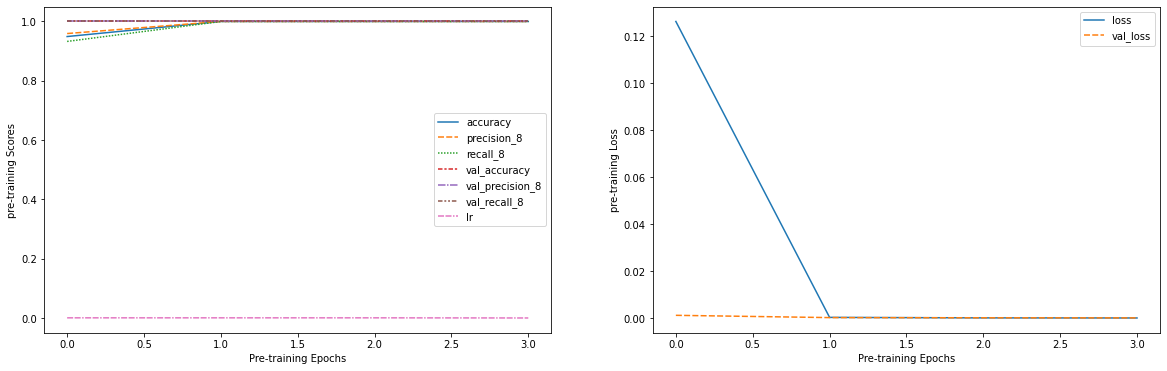

run_id:  2022-05-01_12_38_09.634656_750829c3c91d11eca62aac8247733f47


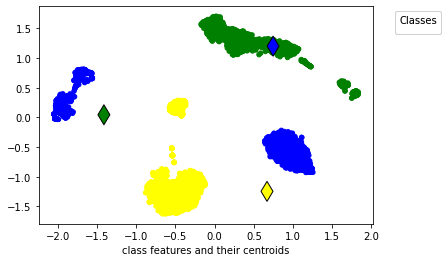

run_id:  2022-05-01_12_39_09.765405_98df6326c91d11ecbd38ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.11it/s]


epoch: 1/15, train_loss: 3.1937146186828613, F1_train: 0.6646788315469537 F1_val: 0.6666576244212963


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.09it/s]


epoch: 2/15, train_loss: 3.1937201023101807, F1_train: 0.14962029407012442 F1_val: 0.11731044349070098
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.04it/s]


epoch: 3/15, train_loss: 3.1936447620391846, F1_train: 0.6707032541872233 F1_val: 0.6623240863542588


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.99it/s]


epoch: 4/15, train_loss: 3.193748950958252, F1_train: 0.6740832303255047 F1_val: 0.65625


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.04it/s]


epoch: 5/15, train_loss: 3.193751335144043, F1_train: 0.6976559396106476 F1_val: 0.6684027777777778


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.99it/s]


epoch: 6/15, train_loss: 3.1938912868499756, F1_train: 0.9194153408355968 F1_val: 0.9947115384615385


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.03it/s]


epoch: 7/15, train_loss: 3.1938302516937256, F1_train: 0.9224447868515665 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.01it/s]


epoch: 8/15, train_loss: 3.193765878677368, F1_train: 0.9229190714377324 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.02it/s]


epoch: 9/15, train_loss: 3.1937813758850098, F1_train: 0.9241784937987471 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.02it/s]


epoch: 10/15, train_loss: 3.193779945373535, F1_train: 0.9254302103250478 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.03it/s]


epoch: 11/15, train_loss: 3.1937062740325928, F1_train: 0.9271388677329272 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.04it/s]


epoch: 12/15, train_loss: 3.1936662197113037, F1_train: 0.9279108070442165 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.05it/s]


epoch: 13/15, train_loss: 3.193753957748413, F1_train: 0.9289866060146575 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.02it/s]


epoch: 14/15, train_loss: 3.1937499046325684, F1_train: 0.92913982569155 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.05it/s]


epoch: 15/15, train_loss: 3.1936850547790527, F1_train: 0.5961125836173167 F1_val: 0.6631944444444444
train score not improving  going to wait state 1
val score not improving  going to wait state 1


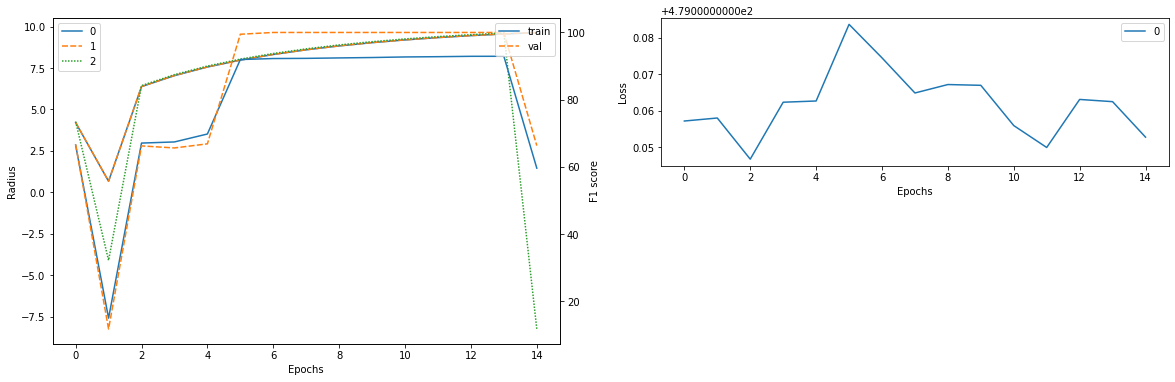

classification report for training:
[[1600    0    0    0]
 [   0 1039    0  561]
 [   0    0 1600    0]
 [   0    0    0    0]]
88.31
f1_weighted: 0.92913982569155, f1_macro: 0.6968548692686624, f1_micro: 0.8831250000000002, f_measure: {'Known': 92.914, 'Open': 0, 'F1-score': 69.6855}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       1.00      0.65      0.79      1600
           2       1.00      1.00      1.00      1600
           3       0.00      0.00      0.00         0

    accuracy                           0.88      4800
   macro avg       0.75      0.66      0.70      4800
weighted avg       1.00      0.88      0.93      4800

classification report for test data:
[[200   0   0   0]
 [  0 200   0   0]
 [  0   0 200   0]
 [  0   0 200   0]]
75.0
f1_weighted: 0.6666666666666665, f1_macro: 0.6666666666666666, f1_micro: 0.75, f_measure: {'Known': 88.8889, 'Open': 0, 'F1-score': 66.6667}
              prec

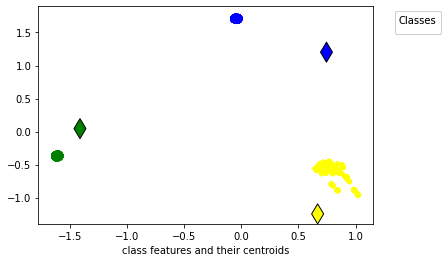

INFO:tensorflow:Assets written to: ram://74c5406f-c097-4b19-a869-c2a8856e8a43/assets


In [20]:
train_test = mlog.get_tensor_train_val_test(ablation=2000, designated_ukc_cls=3 )
train_data, val_data, test_data = train_test
oset = OpenSet()
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
                 pt_epochs=16, oc_epochs=15, oc_lr=3, embedding_size=22, oc_wait=8,
                manual_color_map=True, centroid_black=False, ), #ptmodel_get_mode='import' #centroid_class_color

ablation set to : 2000
parameter value for designated_ukc_cls within multiclass:  3
############## you want to mix log from HDFS, let me try that ##################### 
#### I will change the existing label of BGL to accomodate hdfs label #####
saved file name will be:  bgl_ukc_32_176_time_ip
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_176_time_ip_tk.pkl
taking few selected classes from original bgl:  {'0': 114115, '1': 28439}
changed bgl classes:  {'0': 114115, '1': 28439}
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_176_time_ip.pkl
classes in hdfs df, lebeled_num_seq_df_epn: 
 {'hdfs_anomaly': 16838, 'hdfs_normal': 16838}
hdfs class map:  {'hdfs_normal': '2', 'hdfs_anomaly': '3'}
changed hdfs classes:  {'3': 16838, '2': 16838}
Merged the bgl and hdfs level as the mixed df:  {'0': 11

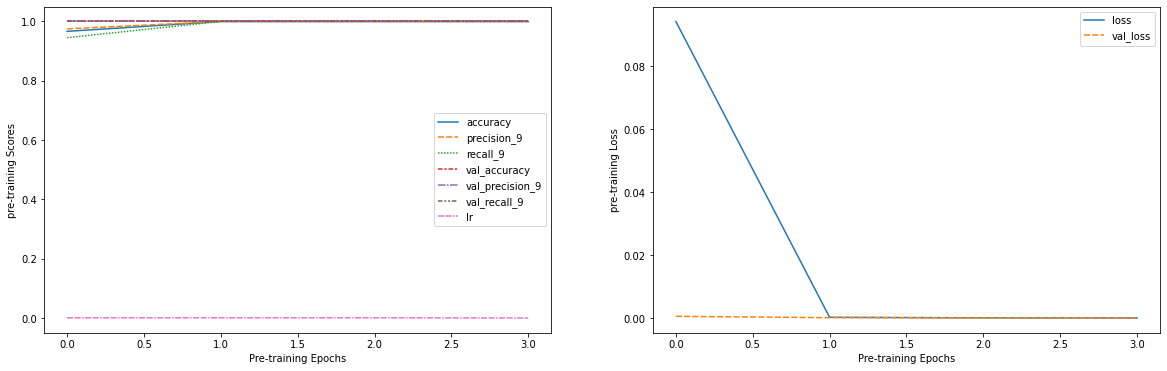

run_id:  2022-05-01_13_30_09.458298_b89778cdc92411ecbaa5ac8247733f47


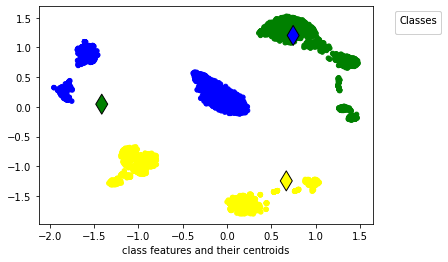

run_id:  2022-05-01_13_31_10.366674_dce55a35c92411ec951bac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.12it/s]


epoch: 1/50, train_loss: 3.2814199924468994, F1_train: 0.6604327055598136 F1_val: 0.6604689593722803


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.10it/s]


epoch: 2/50, train_loss: 3.2814981937408447, F1_train: 0.6614863253057612 F1_val: 0.6509235017774015


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.08it/s]


epoch: 3/50, train_loss: 3.2813615798950195, F1_train: 0.666549935952384 F1_val: 0.6605694444444443


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.10it/s]


epoch: 4/50, train_loss: 3.2814042568206787, F1_train: 0.6715922848566264 F1_val: 0.6553796296296296


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.04it/s]


epoch: 5/50, train_loss: 3.281391143798828, F1_train: 0.67524803504703 F1_val: 0.6666574808935919


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.10it/s]


epoch: 6/50, train_loss: 3.2813751697540283, F1_train: 0.6796615514409865 F1_val: 0.6545045045045046


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.97it/s]


epoch: 7/50, train_loss: 3.2814018726348877, F1_train: 0.6821491831062042 F1_val: 0.671866050973654


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.09it/s]


epoch: 8/50, train_loss: 3.281465530395508, F1_train: 0.6837278326603096 F1_val: 0.6683937823834197


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.12it/s]


epoch: 9/50, train_loss: 3.281402111053467, F1_train: 0.6860814730064124 F1_val: 0.6631853070175437


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.05it/s]


epoch: 10/50, train_loss: 3.2814714908599854, F1_train: 0.6895800509802402 F1_val: 0.6649214659685865


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.14it/s]


epoch: 11/50, train_loss: 3.2814269065856934, F1_train: 0.6930409197303979 F1_val: 0.6597128378378379


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.10it/s]


epoch: 12/50, train_loss: 3.281371593475342, F1_train: 0.6945671384995502 F1_val: 0.6666574320330969


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.14it/s]


epoch: 13/50, train_loss: 3.281355619430542, F1_train: 0.6960860808979318 F1_val: 0.6666576712723086


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.11it/s]


epoch: 14/50, train_loss: 3.2813913822174072, F1_train: 0.6964646856589339 F1_val: 0.6701298934945308


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.04it/s]


epoch: 15/50, train_loss: 3.2813892364501953, F1_train: 0.6972205438254558 F1_val: 0.6666576712723086


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.06it/s]


epoch: 16/50, train_loss: 3.2814157009124756, F1_train: 0.6975977988378192 F1_val: 0.6649215133101851


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:48<00:00,  3.07it/s]


epoch: 17/50, train_loss: 3.281450033187866, F1_train: 0.5252890714037606 F1_val: 0.478882058287796
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:51<00:00,  2.89it/s]


epoch: 18/50, train_loss: 3.281437635421753, F1_train: 0.698350964723547 F1_val: 0.6683938287514318


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:52<00:00,  2.84it/s]


epoch: 19/50, train_loss: 3.2815258502960205, F1_train: 0.6987268771923286 F1_val: 0.6666574808935919


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:51<00:00,  2.92it/s]


epoch: 20/50, train_loss: 3.281512975692749, F1_train: 0.6987268771923286 F1_val: 0.6597131799768517
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:52<00:00,  2.87it/s]


epoch: 21/50, train_loss: 3.2815258502960205, F1_train: 0.6987268771923286 F1_val: 0.6666578089569161
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.01it/s]


epoch: 22/50, train_loss: 3.2813758850097656, F1_train: 0.6987268771923286 F1_val: 0.6631854490500864
train score not improving  going to wait state 3
val score not improving  going to wait state 3


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.01it/s]


epoch: 23/50, train_loss: 3.281320571899414, F1_train: 0.6987268771923286 F1_val: 0.6597129875886525
train score not improving  going to wait state 4
val score not improving  going to wait state 4


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [01:02<00:00,  2.39it/s]


epoch: 24/50, train_loss: 3.281406879425049, F1_train: 0.6987268771923286 F1_val: 0.6631852586713697
train score not improving  going to wait state 5
val score not improving  going to wait state 5


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:57<00:00,  2.63it/s]


epoch: 25/50, train_loss: 3.28149676322937, F1_train: 0.6987268771923286 F1_val: 0.6649214659685865
train score not improving  going to wait state 6
val score not improving  going to wait state 6


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:51<00:00,  2.92it/s]


epoch: 26/50, train_loss: 3.2813174724578857, F1_train: 0.6987268771923286 F1_val: 0.6649214181286549
train score not improving  going to wait state 7
val score not improving  going to wait state 7


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:51<00:00,  2.92it/s]


epoch: 27/50, train_loss: 3.2813615798950195, F1_train: 0.6991023437388459 F1_val: 0.6649214181286549


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:53<00:00,  2.81it/s]


epoch: 28/50, train_loss: 3.2813782691955566, F1_train: 0.6991023437388459 F1_val: 0.6649215601611975
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.98it/s]


epoch: 29/50, train_loss: 3.2814407348632812, F1_train: 0.6991023437388459 F1_val: 0.6657963680734998
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.98it/s]


epoch: 30/50, train_loss: 3.2814648151397705, F1_train: 0.6991023437388459 F1_val: 0.6649216065292096
train score not improving  going to wait state 3
val score not improving  going to wait state 3


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:51<00:00,  2.91it/s]


epoch: 31/50, train_loss: 3.281414270401001, F1_train: 0.6991023437388459 F1_val: 0.6614492437463642
train score not improving  going to wait state 4
val score not improving  going to wait state 4


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:49<00:00,  3.00it/s]


epoch: 32/50, train_loss: 3.281508207321167, F1_train: 0.6991023437388459 F1_val: 0.6666574808935919
train score not improving  going to wait state 5
val score not improving  going to wait state 5


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.97it/s]


epoch: 33/50, train_loss: 3.281506061553955, F1_train: 0.6991023437388459 F1_val: 0.6692685668697418
train score not improving  going to wait state 6
val score not improving  going to wait state 6


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.97it/s]


epoch: 34/50, train_loss: 3.2813034057617188, F1_train: 0.6991023437388459 F1_val: 0.6649212715389186
train score not improving  going to wait state 7
val score not improving  going to wait state 7


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.98it/s]


epoch: 35/50, train_loss: 3.2814462184906006, F1_train: 0.6991023437388459 F1_val: 0.663185402199074
train score not improving  going to wait state 8
val score not improving  going to wait state 8


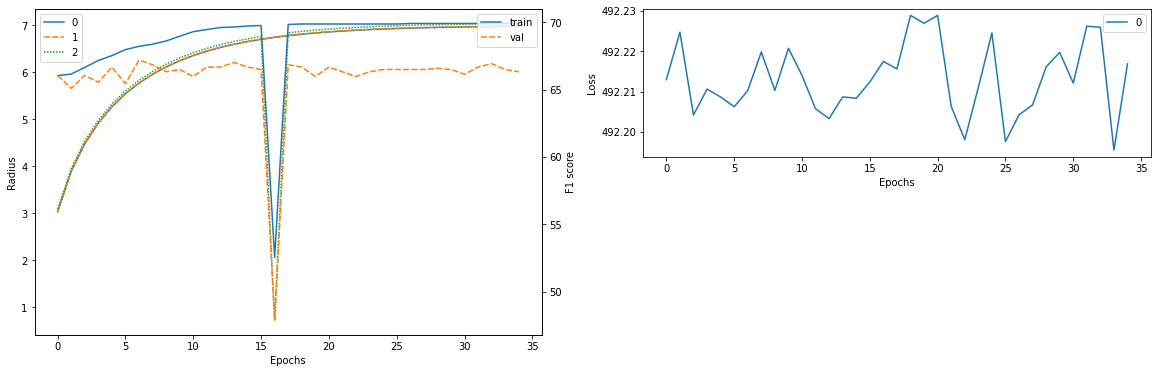

classification report for training:
[[1600    0    0    0]
 [   0   86    0 1514]
 [   0    0 1585   15]
 [   0    0    0    0]]
68.15
f1_weighted: 0.6991023437388459, f1_macro: 0.5243267578041345, f1_micro: 0.6814583333333334, f_measure: {'Known': 69.9102, 'Open': 0, 'F1-score': 52.4327}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       1.00      0.05      0.10      1600
           2       1.00      0.99      1.00      1600
           3       0.00      0.00      0.00         0

    accuracy                           0.68      4800
   macro avg       0.75      0.51      0.52      4800
weighted avg       1.00      0.68      0.70      4800

classification report for test data:
[[200   0   0   0]
 [  0   0   0 200]
 [  0   0 197   3]
 [  0   0 130  70]]
58.38
f1_weighted: 0.5109027925430556, f1_macro: 0.5109027925430556, f1_micro: 0.58375, f_measure: {'Known': 58.2543, 'Open': 29.5983, 'F1-score': 51.0903}
     

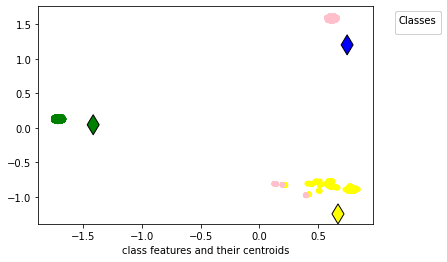

INFO:tensorflow:Assets written to: ram://4c448708-f9e9-4894-b501-0a50be075759/assets


In [21]:
train_test = mlog.get_tensor_train_val_test(ablation=000, designated_ukc_cls=3 )
train_data, val_data, test_data = train_test
oset = OpenSet()
res = oset.train(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data, 
                 pt_epochs=16, oc_epochs=50, oc_lr=2, embedding_size=26, oc_wait=8,
                manual_color_map=True, centroid_black=False, ),